# Prevalence, Causes, and Treatments of Coronary Heart Disease
### by: Chloe Gorgen

In [4]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

### Project Outline:

* Part 1: investigate the major causes of death in the world during the past century
* Part 2: use the Framingham Heart Study to explore the potential link between cholesterol levels and Heart Disease
* Part 3: examine the the Nurses' Heart Study and Heart and Estrogen-Progestin Replacement Study to investigate the effects of Hormone Replacement Therapy on Heart Disease

## Part 1: Exploring Major Causes of Death 

In order to begin our investigation of the causes and treatments of Cardiovascular disease, it is first important to quanitfy the prevalence of Cardiovascular disease among all other majorly recorded causes of death unrelated to age-related natural causes. The data from this portion of the investigation is taken from a document containing the data on the prevalence of each of the 6 leading causes of death from 1900 to 2015. The data is a condensed and aggregated version of multiple datasets collected by the NIH. The set contains 580 observations and 3 varibles: *Year*, *Cause* which indicates one of the six leading causes of death (Accidents, Cancer, Heart Disease, Influenza, Pneumonia, and Stroke), and *Age Adjusted Death Rate* which provides the death rate of each cause of death, standardized against the age of the individual who died, and then adjusted to assume the same age distribution and average life expectancy for each year. This adjusted value prevents changing population patterns and age-related causes of death from affecting the results of this investigation.

The following table gives a glimpse to this data set.

In [8]:
causes_of_death = Table.read_table('causes_of_death.csv')
causes_of_death.show(15)

Year,Cause,Age Adjusted Death Rate
2015,Heart Disease,168.5
2015,Cancer,158.5
2015,Stroke,37.6
2015,Accidents,43.2
2015,Influenza and Pneumonia,15.2
2014,Heart Disease,167
2014,Cancer,161.2
2014,Stroke,36.5
2014,Accidents,40.5
2014,Influenza and Pneumonia,15.1


Now we can begin investigating how these leading causes of death changed in prevalence over time. The table below contains one column for each cause of death and one row for each year. This table was then used to plot each cause of death by Age Adjusted Death Rate over time.

In [7]:
def first(x):
    return x.item(0)

In [41]:
causes_for_plotting = causes_of_death.pivot('Cause', 'Year', values='Age Adjusted Death Rate', collect=first)
causes_for_plotting.show(5)

Year,Accidents,Cancer,Heart Disease,Influenza and Pneumonia,Stroke
1900,90.3,114.8,265.4,297.5,244.2
1901,109.3,118.1,272.6,312.9,243.6
1902,93.6,119.7,285.2,219.3,237.8
1903,106.9,125.2,304.5,251.1,244.6
1904,112.8,127.9,331.5,291.2,255.2


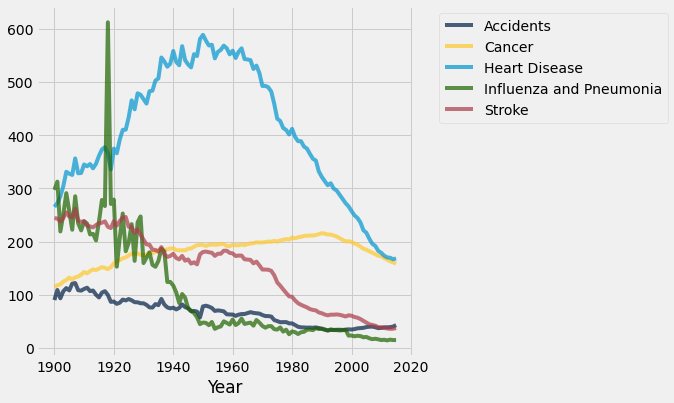

In [45]:
causes_for_plotting.plot('Year')

The graph above shows that deaths related to infections have gone down over time, and deaths related to chronic illness has increased. This phenomenon is known as the epidemiological transition - in developed countries, the severity of infectious disease has decreased, but chronic disease has become more widespread. Coronary heart disease (CHD) is one of the most deadly chronic diseases that has emerged in the past century, and more healthcare resources have been invested to studying it.


## Part 2: Causes of Heart Disease

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. The initial study followed over 5,000 volunteers for several decades. The data set contains 3,842 observations (participants) and includes 8 variables. THe first 7 record information about the participant recorded at the time of inclusion in the study: _AGE_, _SYSBP_ representing the Systalic Blood Pressure, _DIABP_ which represents the Diastalic Blood Pressure, _TOTCHOL_ or measured total cholesterol, _CURSMOKE_ or current smoker status, _DIABETES_ (binomial 0, 1 for false, true), _GLUCOSE_, and _DEATH_ which records whether or not the participant has died. The last variable _ANYCHD_ records whether or not the particiapnt developed any form of heart disease over the vourse of the study. Although the original study contains 5000 participants, any participants who began the study with heart disease has been removed to better investigate the causes of Heart Disease.

The table below gives a glimpse of the data set used in this portion of my investigaiton.

In [15]:
framingham = Table.read_table('framingham.csv')
framingham

AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
39,106,70,195,0,0,77,0,1
46,121,81,250,0,0,76,0,0
48,127.5,80,245,1,0,70,0,0
61,150,95,225,1,0,103,1,0
46,130,84,285,1,0,85,0,0
43,180,110,228,0,0,99,0,1
63,138,71,205,0,0,85,0,1
45,100,71,313,1,0,78,0,0
52,141.5,89,260,0,0,79,0,0
43,162,107,225,1,0,88,0,0


### Section 1: Assessing Sample Generalizability

One of the ways we can assess whether the health of the participants (and therefore our results) is representative of the populaiton is to cheack whether the prevalence of one of the recorded variables matches the prevalence of that characteristic in the population. [According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the prevalence of diagnosed diabetes in the U.S. around the time of this study was 0.93%. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is equivalent to the prevalence of diagnosed diabetes within the population.

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is different than the prevalence of diagnosed diabetes within the population.

Observed prevalence of diabetes in the Framingham Study:

In [16]:
diabetes = framingham.where('DIABETES', are.equal_to(1)).num_rows

no_diabetes = framingham.where('DIABETES', are.equal_to(0)).num_rows

observed_diabetes_prevalanece = diabetes/ (diabetes + no_diabetes)

observed_diabetes_distance = abs(.0093 - observed_diabetes_prevalanece)
observed_diabetes_distance

0.01802951587714732

The following code creates an array of 5,000 simulated statistics of the absolute difference between the prevalence of diabetes in a new simulated study group (resampled from the Framingham study with replacement with the same size as the Framingham study). Then, this array is converted to a histogram of the simulated values, along with the observed value. The observed value is marked in red for comparison.

In [17]:
diabetes_proportions = make_array(.9907, .0093)

def diabetes_statistic():
    diabetes_sample = sample_proportions(3842, diabetes_proportions)
    diabetes_statistic = abs(.0093 - diabetes_sample.item(1))
    return diabetes_statistic


diabetes_simulated_stats = make_array()

for i in np.arange(5000): 
    diabetes_simulated_stats = np.append(diabetes_simulated_stats, diabetes_statistic())
    
diabetes_simulated_stats

array([ 0.00175185,  0.00019016,  0.0003304 , ...,  0.00059068,
        0.00137153,  0.000971  ])

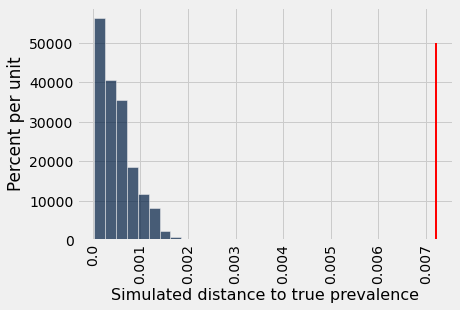

In [20]:
Table().with_column('Simulated distance to true prevalence', diabetes_simulated_stats).hist()
plots.plot([observed_diabetes_distance, observed_diabetes_distance], [0, 500], color='red', lw=2);

The observed value falls far from what we would expect by chance, illustrated by the distribution under the null. Therefore, we reject the null hypothesis and conclude that the probability of a Framingham resident being diagnosed with diabeted is very different from that of the population.

In the context of this hypothesis test, the results of further investigation should be taken with the results of other studies and cross-validated before used in trying to understand the causes of Heart Disease.

### Section 2: Cholesterol and Heart Disease

One of the leading hypothesis within the scientific community is that there is a strong association between elevated cholesterol and increased risk of developing Heart Disease. This relationship can be further explored among the participants of the Framingham study. This hypothesis test will use A/B testing to generate its results.

**Null Hypothesis:** In the population, the distribution of cholesterol levels among those who get heart disease is the same as the distribution of cholesterol levels among those who do not.

**Alternative Hypothesis:** The cholesterol levels of people in the population who get
heart disease are higher, on average, than the cholesterol level of people who do not.

The test statistic is going to be the Total Variation Distance between the cholesterol levels of those with and those without heart disease. If the null hypothesis is correct, then the TVD between the two groups and the TVD when the labels are shuffled should be similar and close to 0. The following code computes and prints the test statistic.

In [53]:
def compute_framingham_test_statistic(tbl):
    with_chd = tbl.where('ANYCHD', 1)
    without_chd = tbl.where('ANYCHD', 0)
    cholesterol_with_chd = np.mean(with_chd.column('TOTCHOL'))
    cholesterol_without_chd = np.mean(without_chd.column('TOTCHOL'))
    return (cholesterol_with_chd - cholesterol_without_chd)

framingham_observed_statistic = compute_framingham_test_statistic(framingham)
framingham_observed_statistic

16.635919905689406

Now that we have the observed Total Variation Distance, the labels of _ANYCHD_ were shuffled and a simulation loop was run to generate 100 test statistics from resampled sets. These sets were sampled to be the same size as the original Framingham study set and were sampled from those participants with replacement. The 100 simulated test statistics were then used to generate a histogram, over which the observed value was drawn in red for comparison.

This test will determine if the observed statistic is significant by comparing it to 100 possible results if the assignment of _ANYCHD_ were due to chance.


<!--
BEGIN QUESTION
name: q2_2_4
manual: false
-->

In [70]:
def simulate_framingham_null():
    shuffled = framingham.sample(with_replacement=True).column('ANYCHD')
    bootstrap = framingham.drop('ANYCHD').with_column('Shuffled ANYCHD', shuffled)
    bootstrap_with_chd = bootstrap.where('Shuffled ANYCHD', 1)
    bootstrap_without_chd = bootstrap.where('Shuffled ANYCHD', 0)
    bootstrap_cholesterol_with_chd = np.mean(bootstrap_with_chd.column('TOTCHOL'))
    bootstrap_cholesterol_without_chd = np.mean(bootstrap_without_chd.column('TOTCHOL'))
    return (bootstrap_cholesterol_with_chd - bootstrap_cholesterol_without_chd)
    
framingham_simulated_stats = make_array()

for i in np.arange(100):
    one_test_stat = simulate_framingham_null()
    framingham_simulated_stats = np.append(one_test_stat, framingham_simulated_stats)

0.70497522947408697

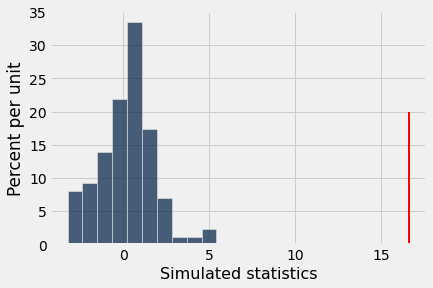

In [103]:
Table().with_column('Simulated statistics', framingham_simulated_stats).hist()
plots.plot([framingham_observed_statistic, framingham_observed_statistic], [0, 0.2], color='red', lw=2);

The p-value is calculated below. This p-value, as well as the histogram, indicate that the Total Variation Distance between the cholesterol levels of those with and without Heart Disease is not due to chance, and there is a relationship between the cholesterol levels and the presence of Heart Disease. 

In [104]:
framingham_p_value = np.count_nonzero(framingham_simulated_stats >= framingham_observed_statistic) / 100
framingham_p_value

0.0

Even though the p value from this trial is extremely high, it cannot be used to show that cholesterol causes heart disease because it only proves that the average cholesterol levels of those with heart disease are higher than those who arent. Additionally, because the data was collected from an observational study, the higher levels of cholesterol could be affected by any number of confounding variables.

## Part 3: Hormone Replacement Therapy for Treatment

### Section 1: The Nurses' Health Study

The Nurses' Health Study (NHS) is an observational study which began in 1976 by Dr. Frank Speizer and continues to this day, with questionnaires that were mailed to 121,964 female registered nurses in the United States asking about their medical history, cholesterol and blood pressure, current medications, etc. The study's initial focus was on investigating the long-term health effects of oral contraceptives, but the focus soon expanded to investigating a wide variety of questions on women's health. 

The NHS found that HRT in postmenopausal women was negatively associated with heart attack risk. In a 1985 paper in the *New England Journal of Medicine* (NEJM), Speizer and his coauthors wrote that
> As compared with the risk in women who had never used postmenopausal hormones, the age-adjusted relative risk of coronary disease in those who had ever used them was 0.5 (95 per cent confidence limits, 0.3 and 0.8; P = 0.007)... These data support the hypothesis that the postmenopausal use of estrogen reduces the risk of severe coronary heart disease. [(Stampfer et al., 1985)](https://www.ncbi.nlm.nih.gov/pubmed/4047106)



**The scientists running the NHS wanted to compare post-menopausal women who had taken HRT with post-menopausal women who had never taken HRT, excluding all women who were not post-menopausal or who had previously suffered a heart attack.**

The table below which was created from the raw NHS data includes 105,787 observations with 2 vaiables: _HRT_ or the status of taking Hormone Replacement Therapy, and _Heart Attack_ which tells whether or not they had a Heart Attack while participating in the study. In order to account for all of the reasons someone may drop out of the study, and the amount of time each participant participated in the study, each observation represents a person-year, creating a different observation for each year that someone participated in the study. Therefore, the _Heart Attack_ variable indicates whether or not that participant experienced a heart attack suring that year of their participation. 

It reports 51,478 total person-years at risk in the no-HRT group with 60 heart attacks occurring in total, as well as 54,309 person-years at risk in the HRT group with 30 heart attacks occurring in total. A glimpse of the data is shown below.

In [7]:
NHS = Table.read_table('NHS.csv')
NHS.show(15)

HRT,Heart Attack
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0


Using the NHS data, we can now conduct a hypothesis test to investigate the relationship between HRT and risk of CHD. We'll set up the test as follows:

> **Null Hypothesis:** HRT does not affect the risk of CHD, and the true relative risk is equal to 1. Any deviation is due to random chance

> **Alternative Hypothesis:** HRT decreases the risk of CHD, and the true relative risk is less than 1.

> **Test Statistic:** Relative risk of CHD between post-menopausal women receiving HRT and post-menopausal women not receiving HRT (the definition of relative risk is repeated here for your convenience):

$$\text{Relative Risk} = \frac{\text{Hazard Rate(Treatment Group)}}{\text{Hazard Rate(Control Group)}}$$



The code below calculates the relative risk of the participants included in the table NHS. This value will represent the observed value which will be used against simulated relative risk statistics in testing the hypotheses.

In [8]:
def relative_risk(tbl):
    """Return the ratio of the hazard rates (events per person-year) for the two groups"""
    treatment_hazard = tbl.where('HRT', are.equal_to(1)).where('Heart Attack', are.equal_to(1)).num_rows/ tbl.where("HRT", are.equal_to(1)).num_rows
    control_hazard = tbl.where('HRT', are.equal_to(0)).where('Heart Attack', are.equal_to(1)).num_rows/ tbl.where("HRT", are.equal_to(0)).num_rows
    return treatment_hazard / control_hazard
relative_risk(NHS)

0.47393618000699694

Further, the code below creates an array of simulated results r=using sampling with replacement (or bootstrapping). 

In [10]:
def one_bootstrap_rr():
    return bootstrap_rrs

bootstrap_rrs = make_array()
for i in np.arange(14):
    new_bootstrap_rr = relative_risk(NHS.sample())
    bootstrap_rrs = np.append(bootstrap_rrs, new_bootstrap_rr)

bootstrap_rrs_from_tbl = Table.read_table('bootstrap_rrs.csv').column(0)
ci_left = percentile(2.5, bootstrap_rrs)
ci_right = percentile(97.5, bootstrap_rrs)

print("Middle 95% of bootstrappped relative risks: [{:f}, {:f}]".format(ci_left, ci_right))

Middle 95% of bootstrappped relative risks: [0.332459, 0.491877]


The code below plots the confidence interval on top of a histogram of the range of possible values calcualted by the simulation.

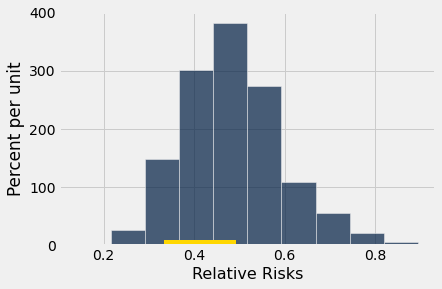

In [11]:
Table().with_column("Relative Risks", bootstrap_rrs_from_tbl).hist()
plots.plot([ci_left, ci_right], [.05,.05], color="gold");

From this test we can conclude that HRT is associated with a reduced risk of heart attacks. Our 95% confidence interval (0.3, 0.8) doesn't contain our null value (risk ratio = 1), which allows us to assume that the population value probably is less than 1. The study design is observational, where a group of people is followed for a period of time and their condition is monitored—however, the researchers didn't actually give certain women HRT, so it's not an experiment. Only experiments show causation, so we cannot say that HRT caused a change in risk of heart attacks, only that it is associated with a reduced risk.


### Section 2: The Heart and Estrogen-Progestin Replacement Study

The Heart and Estrogen-Progestin Replacement Study (HERS) was a randomized controlled trial carried out by the Women's Health Initiative, which sought to verify whether HRT drugs were as effective as observational studies suggested. 2,763 women with a history of heart disease were selected and randomly assigned to receive a treatment of daily estrogen pills or a placebo pill. Of the 2,763 women participating, 1,380 were assigned to the treatment condition and 1,383 to the control. They were followed for an average of three years and the number of heart attacks in the two groups was compared.

The main results table from the HERS study [Hulley et al. (1998)](https://jamanetwork.com/journals/jama/fullarticle/187879) is reproduced here:

<img src="HERS-table.png" width=500>

For this study, we constructed our own table from scratch based on the results given above. The results are contained in the table `HERS` that has one row for each woman in the trial and two columns: `HRT`, which is 1 if she was assigned to treatment and 0 otherwise, and `CHD`, which is 1 if she suffered a Primary CHD (Coronary Heart Disease) event and 0 otherwise.

The code below displays the resultsof the HERS study.

In [13]:
num_control = 1383 
num_treatment = 1380

num_control_chd = 176
num_treatment_chd = 172

hrt = np.append(np.zeros(num_control), np.ones(num_treatment))
chd_control = np.append(np.zeros(num_control - num_control_chd), np.ones(num_control_chd))
chd_treatment = np.append(np.zeros(num_treatment - num_treatment_chd), np.ones(num_treatment_chd))
chd = np.append(chd_control, chd_treatment)

HERS = Table().with_columns('HRT', hrt, 'CHD', chd)
HERS.show(3)

HRT,CHD
0,0
0,0
0,0


In order to test whether HRT was shown to be an effective treatment for Heart Disease from this study, a p-value will be calculated which compared the average CHD rates between experimental groups in the study and CHD rates from random, simulated groups representing the range of all possible CHD rates due to chance. Our observed test statistic is going to measure the average CHD rates among participants as recorded in the study. It is calculated in the following block of code.

In [14]:
def HERS_test_statistic(tbl):
    """Test statistic: Distance between the average responses"""
    treatment_average = np.average(tbl.where('HRT', 1).column('CHD'))
    control_average = np.average(tbl.where('HRT', 0).column('CHD'))
    return abs(treatment_average - control_average)
observed_HERS_test_statistic = HERS_test_statistic(HERS)
observed_HERS_test_statistic

0.0026218994624162967

Now, as comparison an array of simulated samples was created from the given sample and the test statistic was calculated. Then, these results are compiled into a histogram and the observed value is plotted in red for comparison. This graph shows how different the observed value is from what is likely if the null hypothesis were true. The simulation was run 2000 times to create the histogram.

In [15]:
def simulate_one_HERS_statistic():
    new_HRT = HERS.sample(with_replacement=True).column('HRT')
    sample_table = HERS.drop('HRT').with_column('HRT', new_HRT)
    return HERS_test_statistic(sample_table)

HERS_test_statistics = make_array()
for i in np.arange(2000):
    new_HERS_statistic = simulate_one_HERS_statistic()
    HERS_test_statistics = np.append(new_HERS_statistic, HERS_test_statistics)

The code below generates a histogram of the simulated test statistics along with the test statistic:

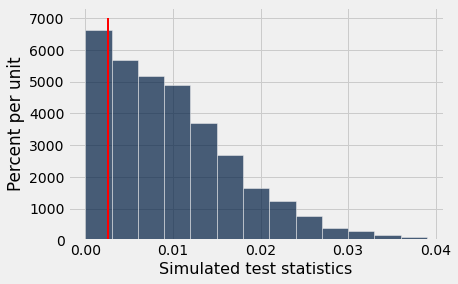

In [16]:
Table().with_column('Simulated test statistics', HERS_test_statistics).hist(bins=np.arange(0,.04,.003))
plots.plot([HERS_test_statistic(HERS), HERS_test_statistic(HERS)], [0, 70], color='red', lw=2);

The significance of the results above is quanified by calculating a p-value. This value counts the number of times the calculated test statistic is greater than or equal to the obsevred statistic and then turns this into a percentage of the total simulated samples. 

In [17]:
HERS_pval = np.count_nonzero(HERS_test_statistics >= observed_HERS_test_statistic) / 2000
HERS_pval

0.8305

Based on the p-value and histogram generated by simulation, we fail to reject the null hypothesis: the HERS data supports the claim that HRT does not affect CHD risk. Our p-value is very high, indicating that our observed test statistic (the abs. difference between heart attacks in women receiving and not receiving HRT) is not outside of the possible outcomes which could be achieved by chance alone. The 95% confidence interval contains our null hypothesis value, so we also fail to reject the null. We have 95% confidence in the procedure for calculating the CI, meaning that in 95% of the random samples we take, the calculated CI will contain the population risk. 

The Heart and Estrogen-Progestin Replacement Study found that HRT did not have a significant impact on a woman's risk of CHD. These findings contradicted the results of the Nurses' Heart study, challenging the efficacy of a treatment that had become the standard of care for heart disease prevention. 

The HERS study authors put forward a possible answer regarding why the NHS study might be biased:
> However, the observed association between estrogen therapy and reduced CHD risk might be attributable to selection bias if women who choose to take hormones are healthier and have a more favorable CHD profile than those who do not. Observational studies cannot resolve this uncertainty.


One explanation for this anomoly in results is selection bias. If the women who choose to take hormones are healthier entering the study than the women who choose not to take hormones, they are going to continue to show better health throughout the study than the women who are not on hormone therapy. This confounding factor systematically biases the data in favor of the hormone therapy. Assuming this were a RCT and all variables were controlled except for this factor, these results would overesttimate the efficacy of the hormone therapy in better health outcomes. This example shows why observational studies are limited in proving a casuational association.